In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
df=pd.read_csv('/content/creditcard.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132784 entries, 0 to 132783
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    132784 non-null  int64  
 1   V1      132784 non-null  float64
 2   V2      132784 non-null  float64
 3   V3      132784 non-null  float64
 4   V4      132784 non-null  float64
 5   V5      132784 non-null  float64
 6   V6      132784 non-null  float64
 7   V7      132784 non-null  float64
 8   V8      132784 non-null  float64
 9   V9      132784 non-null  float64
 10  V10     132784 non-null  float64
 11  V11     132784 non-null  float64
 12  V12     132784 non-null  float64
 13  V13     132784 non-null  float64
 14  V14     132784 non-null  float64
 15  V15     132784 non-null  float64
 16  V16     132784 non-null  float64
 17  V17     132784 non-null  float64
 18  V18     132784 non-null  float64
 19  V19     132784 non-null  float64
 20  V20     132784 non-null  float64
 21  V21     13

In [8]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [11]:
df.isnull().sum().sum()

5

In [12]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

495

In [10]:
df = df.drop_duplicates()

Test and Train

In [22]:
X = df.drop('Class', axis=1)
y = df['Class']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

print("\nTraining set")
print(df_train.shape)
print("\nTest set:")
print(df_test.shape)


Training set
(119059, 31)

Test set:
(13229, 31)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


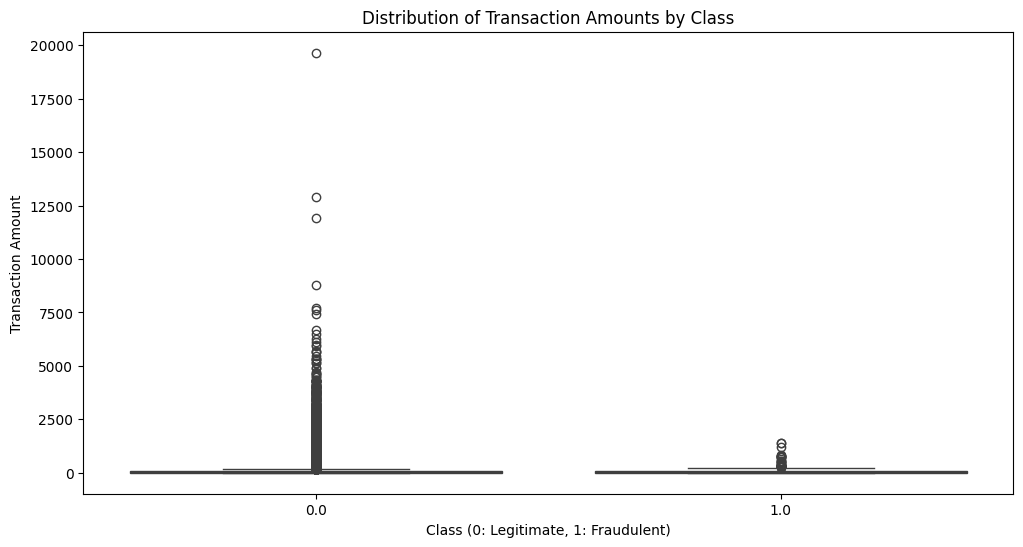

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=df_train)
plt.title('Distribution of Transaction Amounts by Class')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Transaction Amount')
plt.show()

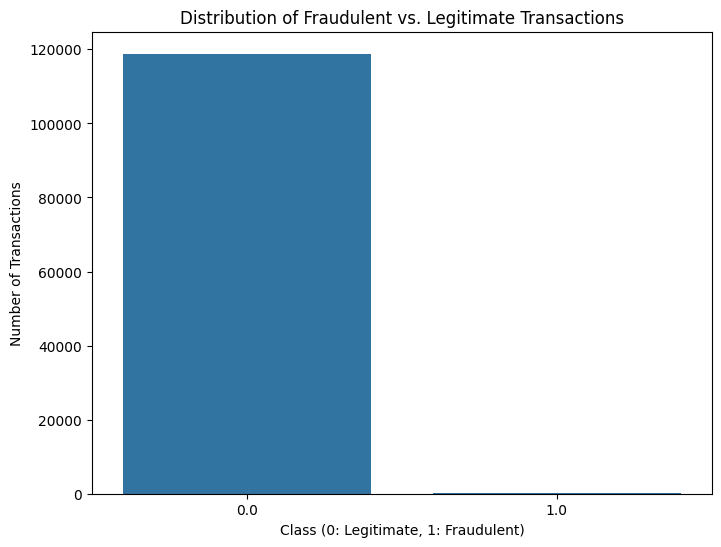

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df_train)
plt.title('Distribution of Fraudulent vs. Legitimate Transactions')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Number of Transactions')
plt.show()

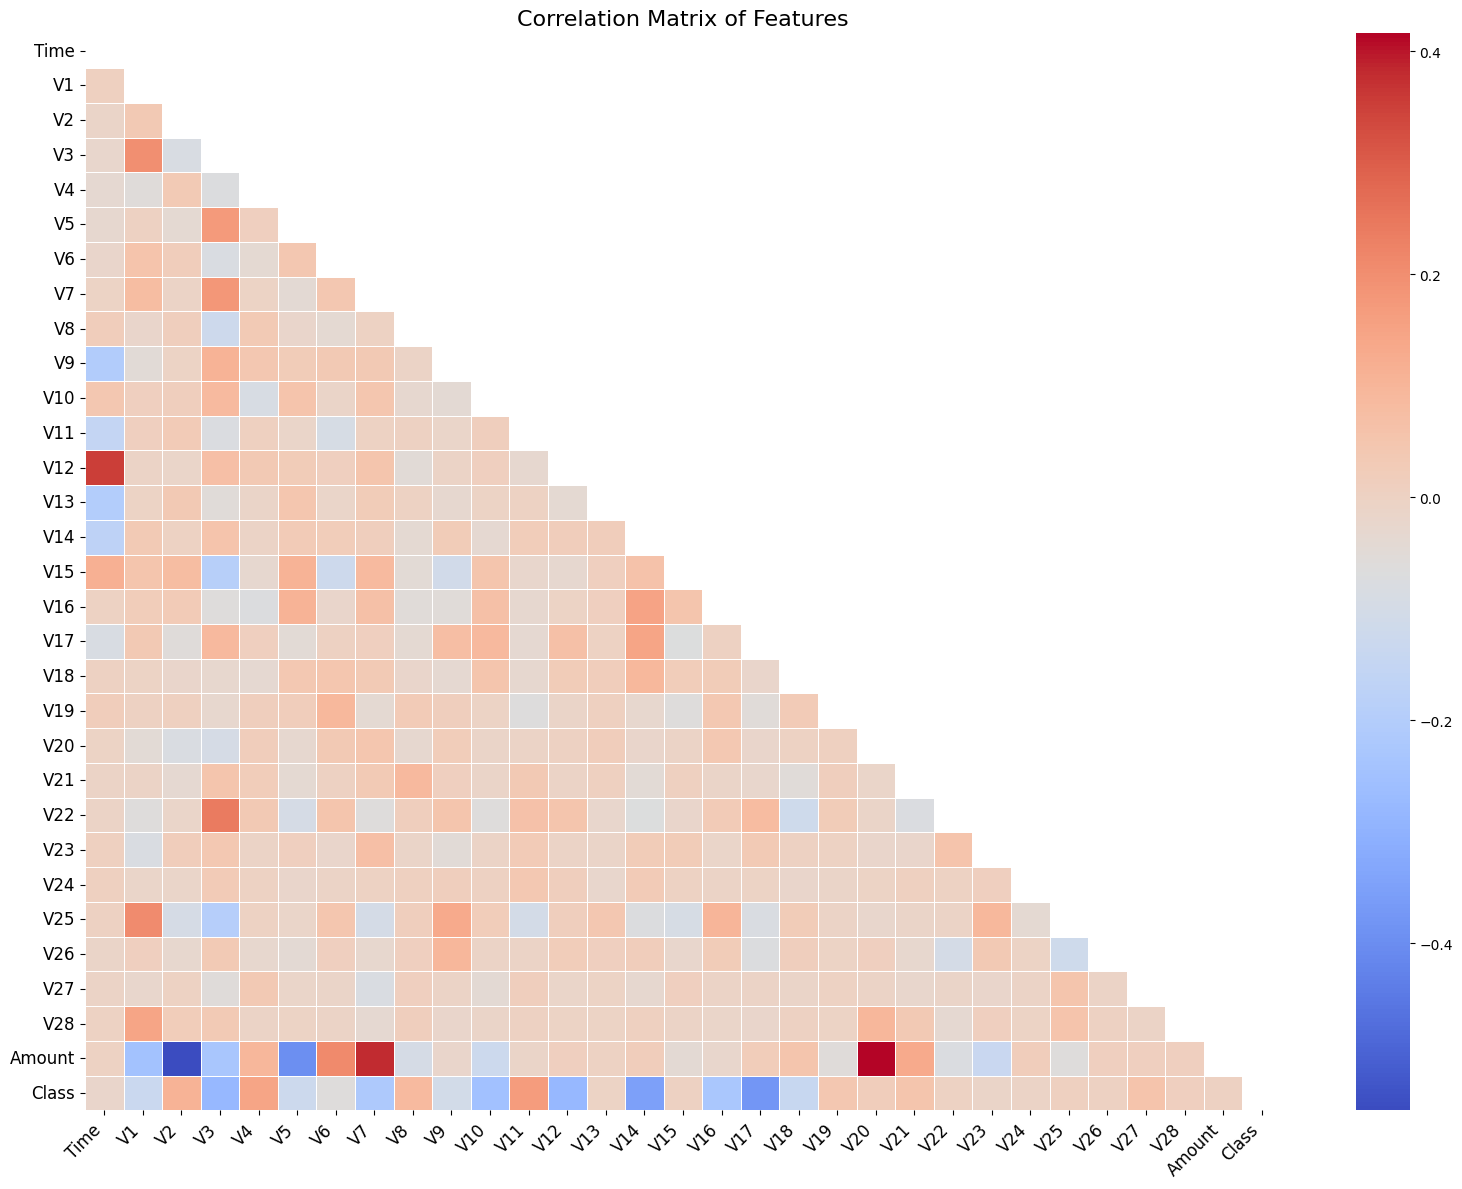

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
correlation_matrix = df_train.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", mask=mask, linewidths=.5)

plt.title('Correlation Matrix of Features', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


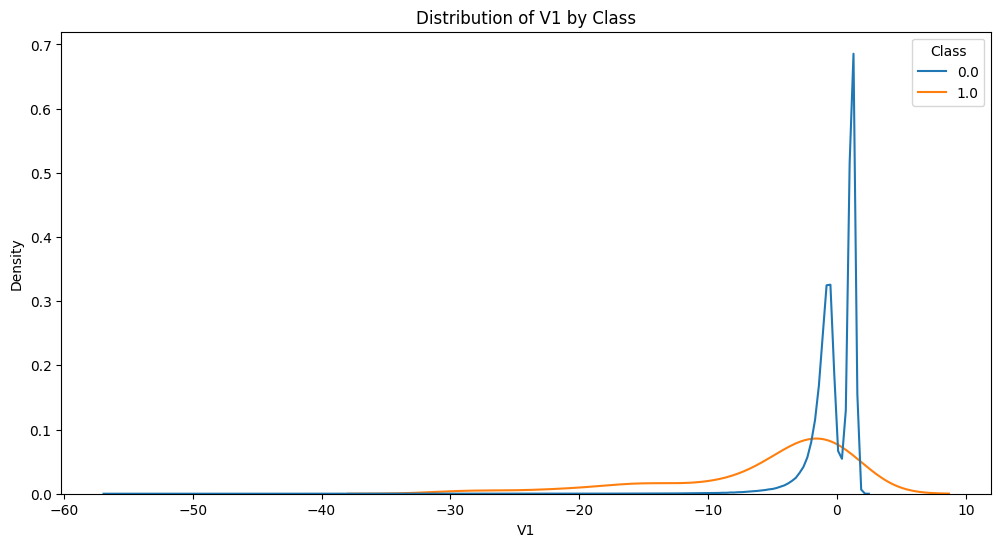

In [35]:
feature_to_analyze = 'V1'
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_train, x=feature_to_analyze, hue='Class', common_norm=False)
plt.title(f'Distribution of {feature_to_analyze} by Class')
plt.xlabel(feature_to_analyze)
plt.ylabel('Density')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


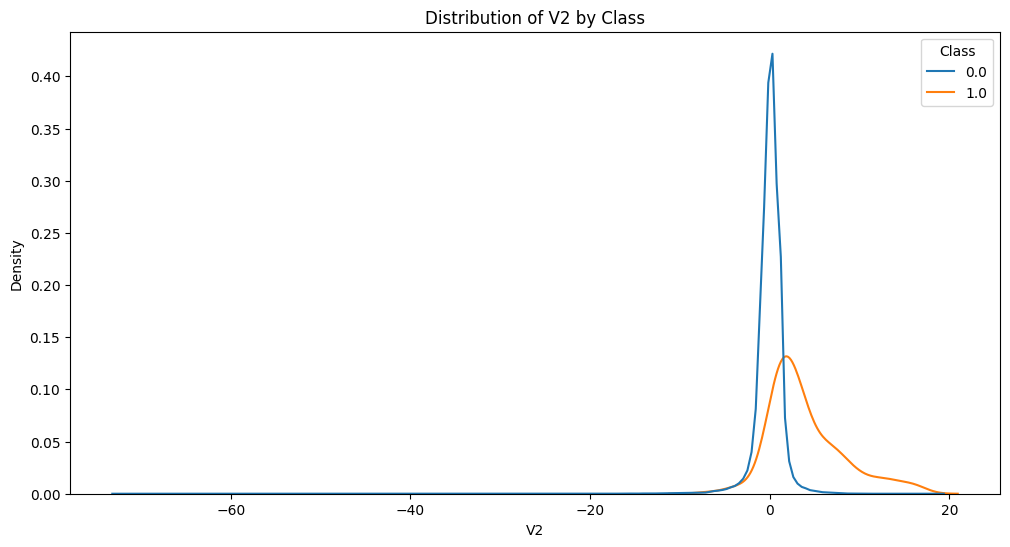

In [87]:
feature_to_analyze = 'V2'
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_train, x=feature_to_analyze, hue='Class', common_norm=False)
plt.title(f'Distribution of {feature_to_analyze} by Class')
plt.xlabel(feature_to_analyze)
plt.ylabel('Density')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


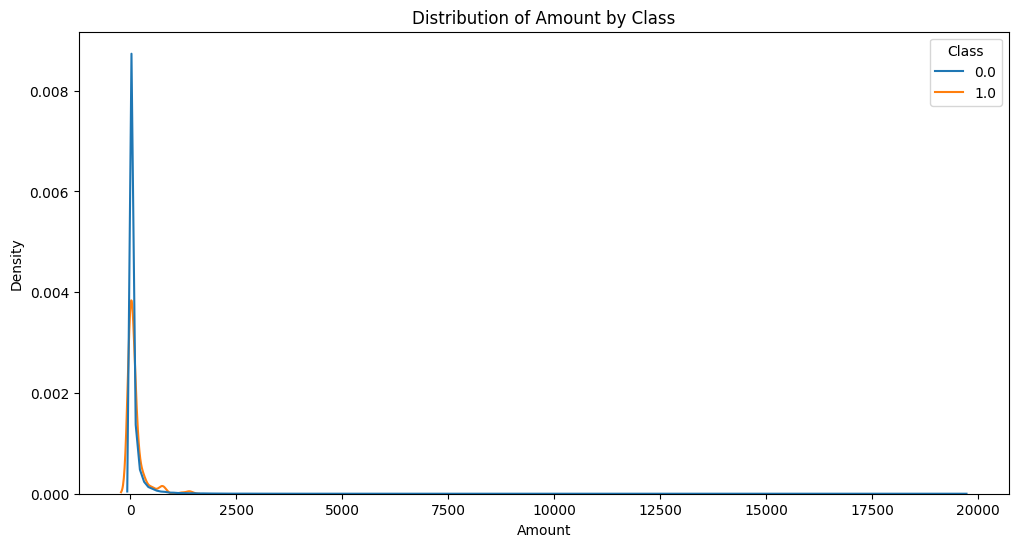

In [88]:
feature_to_analyze = 'Amount'
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_train, x=feature_to_analyze, hue='Class', common_norm=False)
plt.title(f'Distribution of {feature_to_analyze} by Class')
plt.xlabel(feature_to_analyze)
plt.ylabel('Density')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


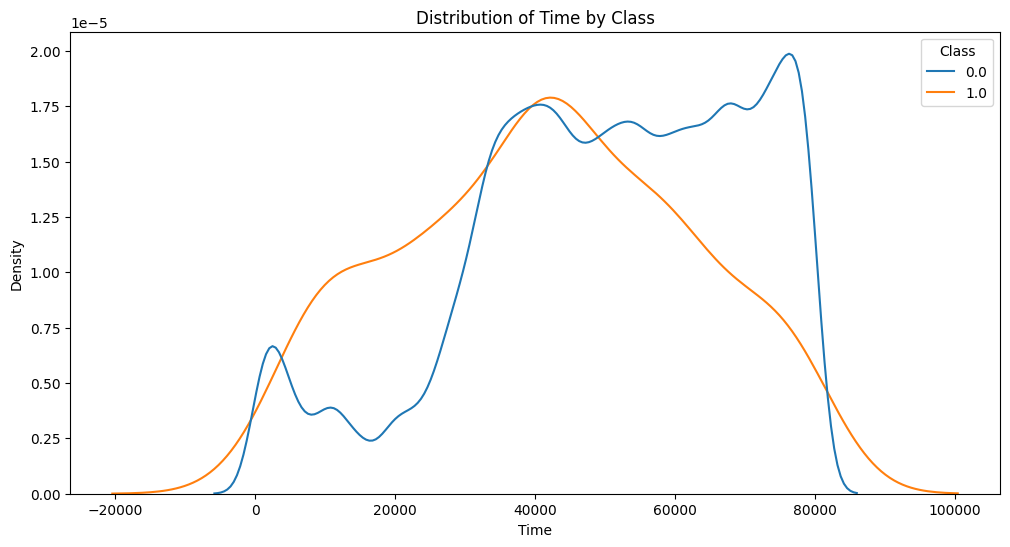

In [89]:
feature_to_analyze = 'Time'
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_train, x=feature_to_analyze, hue='Class', common_norm=False)
plt.title(f'Distribution of {feature_to_analyze} by Class')
plt.xlabel(feature_to_analyze)
plt.ylabel('Density')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

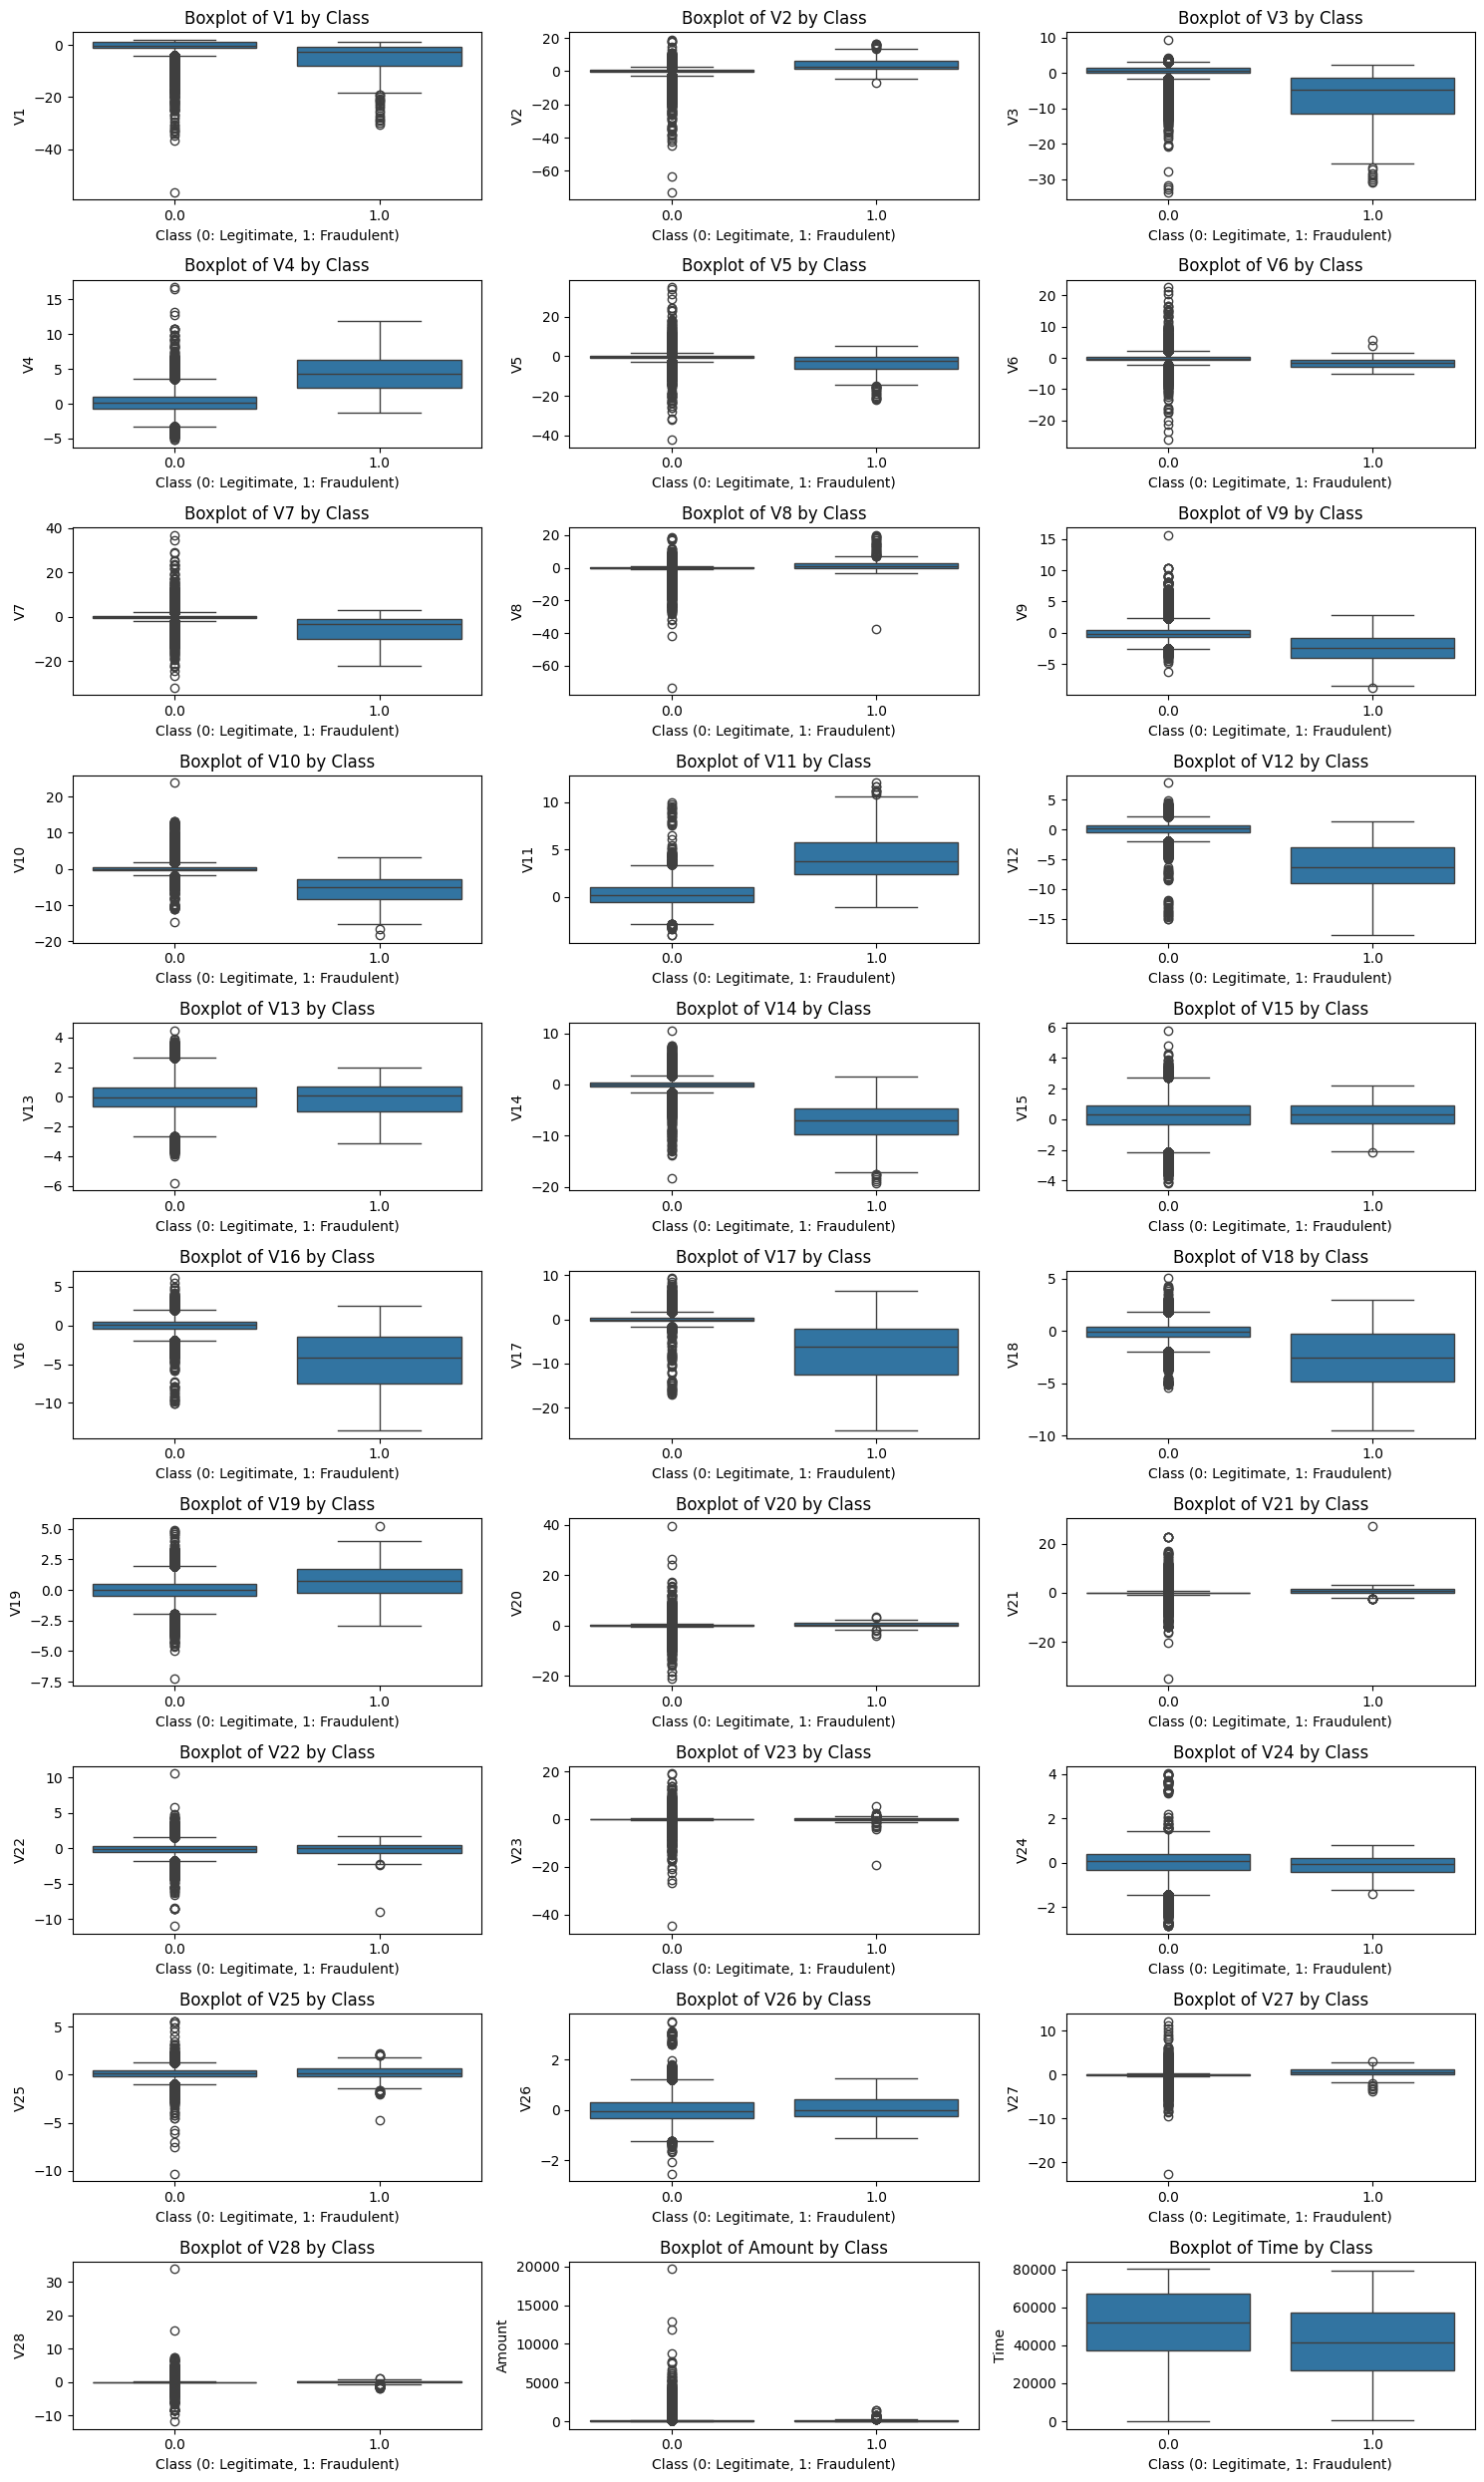

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot_by_class(ax, df, column):

  sns.boxplot(x='Class', y=column, data=df, ax=ax)
  ax.set_title(f'Boxplot of {column} by Class')
  ax.set_xlabel('Class (0: Legitimate, 1: Fraudulent)')
  ax.set_ylabel(column)


num_plots = 30
fig, axs = plt.subplots(nrows=10, ncols=3, figsize=(15, 25))
axs = axs.flatten()


for i in range(1, 29):
    column_name = f"V{i}"
    plot_boxplot_by_class(axs[i - 1], df_train, column_name)

plot_boxplot_by_class(axs[28], df_train, 'Amount')
plot_boxplot_by_class(axs[29], df_train, 'Time')


plt.tight_layout()
plt.show()

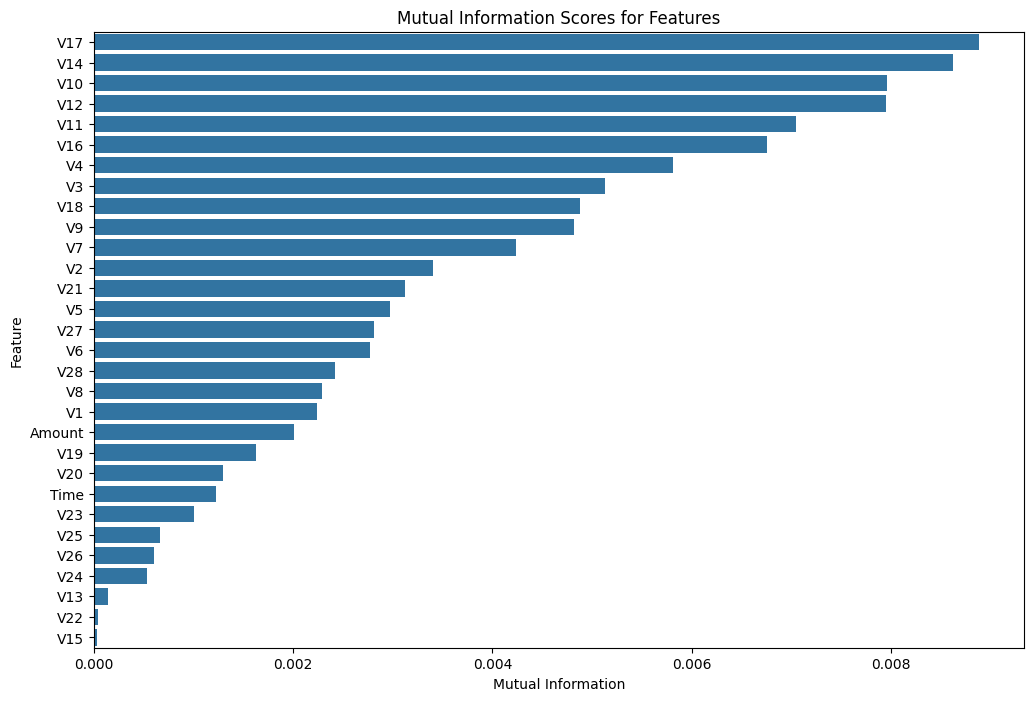

In [86]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info_results = pd.DataFrame({'Feature': X_train.columns, 'Mutual Information': mutual_info})
mutual_info_results_sorted = mutual_info_results.sort_values(by='Mutual Information', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Mutual Information', y='Feature', data=mutual_info_results_sorted, orient='h')
plt.title('Mutual Information Scores for Features')
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.show()

In [84]:
print(df_train.groupby('Class').describe())

           Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0.0    118828.0  50268.708040  20182.683825    0.0  37156.5  52063.0   
1.0       231.0  41592.398268  20633.833891  406.0  26848.0  41313.0   

                                V1            ...       V28             \
            75%      max     count      mean  ...       75%        max   
Class                                         ...                        
0.0    67216.25  80110.0  118828.0 -0.230219  ...  0.076692  33.847808   
1.0    57085.00  79540.0     231.0 -5.697686  ...  0.396565   1.130625   

         Amount                                                                
          count        mean         std  min   25%    50%       75%       max  
Class                                                                          
0.0    118828.0   92.183280 

Model Random Forest



In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix



In [53]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [54]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [55]:
y_pred = rf_classifier.predict(X_test)

In [56]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26395
         1.0       0.98      0.81      0.89        63

    accuracy                           1.00     26458
   macro avg       0.99      0.90      0.94     26458
weighted avg       1.00      1.00      1.00     26458

Confusion Matrix:
 [[26394     1]
 [   12    51]]
Accuracy: 0.9995086552271525


In [57]:
logistic_regression_model = LogisticRegression(max_iter=1000)

In [59]:
logistic_regression_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Trying logistic Regression

In [60]:
y_pred_lr = logistic_regression_model.predict(X_test)

In [61]:
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_lr))

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy for Logistic Regression: {accuracy_lr}")

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26395
         1.0       0.79      0.43      0.56        63

    accuracy                           1.00     26458
   macro avg       0.90      0.71      0.78     26458
weighted avg       1.00      1.00      1.00     26458

Confusion Matrix for Logistic Regression:
 [[26388     7]
 [   36    27]]
Accuracy for Logistic Regression: 0.9983747826744274


Evalutaing model with undersampling

In [62]:
from imblearn.under_sampling import RandomUnderSampler

In [63]:
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [64]:
rf_classifier_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_resampled.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [65]:
y_pred_resampled = rf_classifier_resampled.predict(X_test)

In [77]:
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_resampled, average=None)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Support:", support)

Precision: [0.99984463 0.08274895]
Recall: [0.97522258 0.93650794]
F1-Score: [0.98738013 0.15206186]
Support: [26395    63]


In [66]:
print("Classification Report (with Under-Sampling):\n", classification_report(y_test, y_pred_resampled))
print("Confusion Matrix (with Under-Sampling):\n", confusion_matrix(y_test, y_pred_resampled))

accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f"Accuracy (with Under-Sampling): {accuracy_resampled}")

Classification Report (with Under-Sampling):
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     26395
         1.0       0.08      0.94      0.15        63

    accuracy                           0.98     26458
   macro avg       0.54      0.96      0.57     26458
weighted avg       1.00      0.98      0.99     26458

Confusion Matrix (with Under-Sampling):
 [[25741   654]
 [    4    59]]
Accuracy (with Under-Sampling): 0.9751303953435634


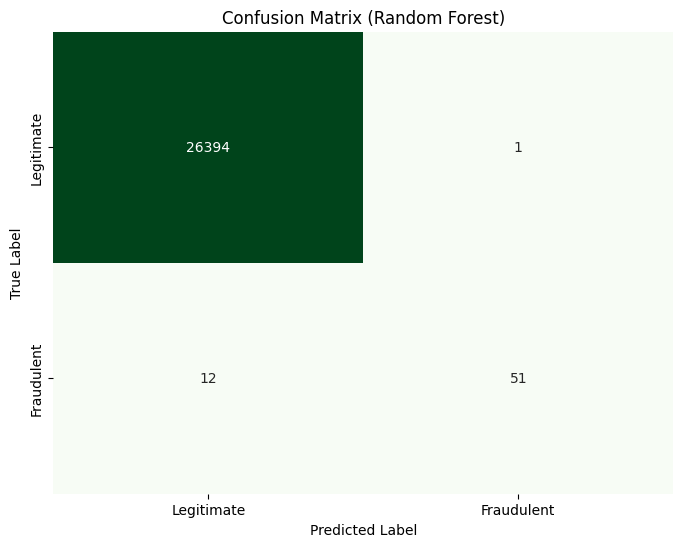

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Legitimate', 'Fraudulent'],
            yticklabels=['Legitimate', 'Fraudulent'])
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Evaluating model with over sampling

In [74]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_resampled_os, y_train_resampled_os = ros.fit_resample(X_train, y_train)

In [71]:
rf_classifier_resampled_os = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_resampled_os.fit(X_train_resampled_os, y_train_resampled_os)

RandomForestClassifier(random_state=42)

In [72]:
y_pred_resampled_os = rf_classifier_resampled_os.predict(X_test)

In [73]:
precision = precision_score(y_test, y_pred_resampled_os)
recall = recall_score(y_test, y_pred_resampled_os)
f1 = f1_score(y_test, y_pred_resampled_os)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Precision: 0.9811320754716981
Recall: 0.8253968253968254
F1-Score: 0.896551724137931


In [76]:
print("Classification Report (with Oversampling):\n", classification_report(y_test, y_pred_resampled))
print("Confusion Matrix (with Oversampling):\n", confusion_matrix(y_test, y_pred_resampled))

accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
print(f"Accuracy (with Oversampling): {accuracy_resampled}")

Classification Report (with Oversampling):
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     26395
         1.0       0.08      0.94      0.15        63

    accuracy                           0.98     26458
   macro avg       0.54      0.96      0.57     26458
weighted avg       1.00      0.98      0.99     26458

Confusion Matrix (with Oversampling):
 [[25741   654]
 [    4    59]]
Accuracy (with Oversampling): 0.9751303953435634


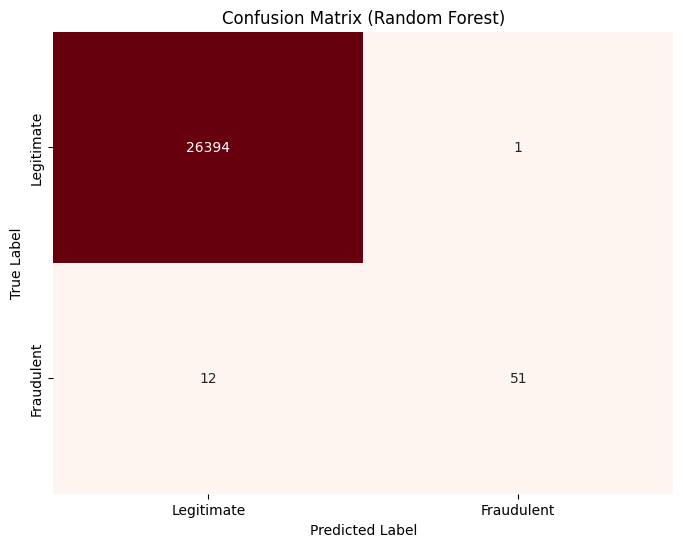

In [83]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Legitimate', 'Fraudulent'],
            yticklabels=['Legitimate', 'Fraudulent'])
plt.title('Confusion Matrix (Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()